In [31]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense
from keras.layers import Dropout, Activation, Flatten
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

%matplotlib inline

In [4]:
np.random.seed(32)
NUM_CLASSES = 10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
TYPE_MAP = {
    0: 'Plain',
    1: 'Auto',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

In [6]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

Image: Plain


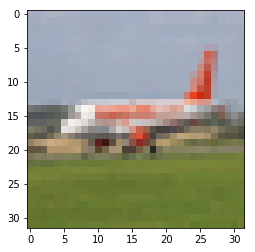

In [27]:
import random

dataset_size = X_train.shape[0]

idx = random.randint(0, dataset_size)
#sample = random.choice(X_train)

sample_img = X_train[idx]
sample_label = np.argmax(y_train[idx])

print("Image: %s" % TYPE_MAP[sample_label])
#print(sample_img)
plt.imshow(sample_img)

In [33]:
input_shape = X_train.shape[1:]

model = Sequential()

# daha az ve kucuk filtreler bu model icin daha iyi olabilir

model.add(Conv2D(32, (5, 5), padding='same', input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv2D(64, (4, 4), padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES))
# model.add(Dense(NUM_CLASSES, activation='softmax'))
# normally it is better to use the code line above but because of 
# dependency problems in the current environment, I used the code line below
model.add(Activation(tf.nn.softmax))

print(model.count_params())
print(model.summary())

"""
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
"""

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

6002154
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
activation_33 (Activation)   (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 15, 15, 64)        51264     
__

In [34]:
model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, 
          validation_data=(X_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 1994s 40ms/step - loss: 1.8900 - acc: 0.2807 - val_loss: 1.5327 - val_acc: 0.4351


In [35]:
model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 100s 10ms/step


[1.5326976301193238, 0.4351]

Image: Plain
Probability of being Plain: 87.91%
Probability of being Auto: 0.15%
Probability of being Bird: 0.95%
Probability of being Cat: 0.03%
Probability of being Deer: 0.14%
Probability of being Dog: 0.02%
Probability of being Frog: 0.00%
Probability of being Horse: 0.02%
Probability of being Ship: 10.70%
Probability of being Truck: 0.09%


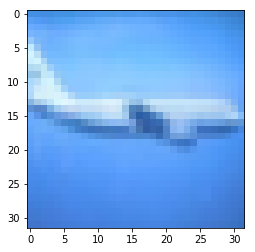

In [45]:
idx = random.randint(0, X_test.shape[0])

sample_img = X_test[idx]
sample_label = np.argmax(y_test[idx])

print("Image: %s" % TYPE_MAP[sample_label])
plt.imshow(sample_img)

sample_img = sample_img.reshape(1, 32, 32, 3)

for i, v in enumerate(model.predict(sample_img)[0]):
  print("Probability of being %s: %.2f%%" % (TYPE_MAP[i], v * 100))

In [46]:
"""
for layer in model.layers:
  print("Layer : \n"), layer.get_weights()
"""
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]

#print(biases)

# to save weights and layers to use later
model.save_weights('cifar10-cnn.h5')

# to use the saved training, create the same layes and model.compile, then model load
model.load_weights('cifar10-cnn.h5')